# "Cross-validation" des modèles

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm


## Creer des données synthetiques 

In [60]:
N = 1000
p0 = 0.0
theta0 = 0
wt = np.pi/15
theta = np.random.randn(N)*np.pi/8 
a = (theta-theta0)/wt
p = p0/2 + ((1-p0)/(1+np.exp(-a)))
y = np.random.rand(N) < p 

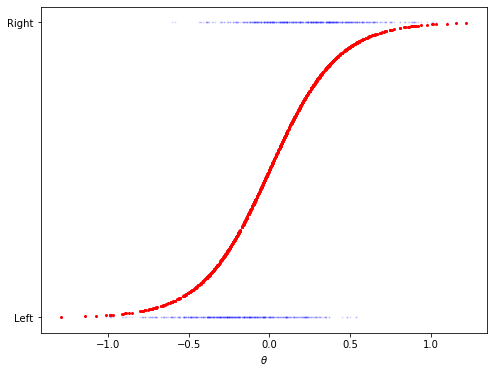

In [61]:
plt.figure(figsize = (8,6)) 
plt.scatter(theta, p, s=4, color = 'r')
plt.scatter(theta, y, s=1, alpha=.1, color = 'b')
plt.xlabel(r'$\theta$')
plt.yticks([0.,1.],['Left', 'Right']);

## fit

In [62]:
#print(p.shape)
#p = np.array(p).reshape(-1, 1)
#theta = np.array(theta).reshape(-1,1)
#print(p.shape)
#regression logistique 
from sklearn.linear_model import LogisticRegression
lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})
model = LogisticRegression()#**lr_kwargs)
#model = LogisticRegression (C = 3, max_iter = 100, penalty = 'l2')  
model.fit(theta[:, None], y)

# p prediction error 
#from sklearn.model_selection import cross_val_predict
#predicted = cross_val_predict(model, theta, p, cv = 2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
model.coef_[0][0]

4.483402047122845

In [64]:
A = np.zeros((5, 4))
A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [65]:
A[:2, :][:, :, np.newaxis].shape

(2, 4, 1)

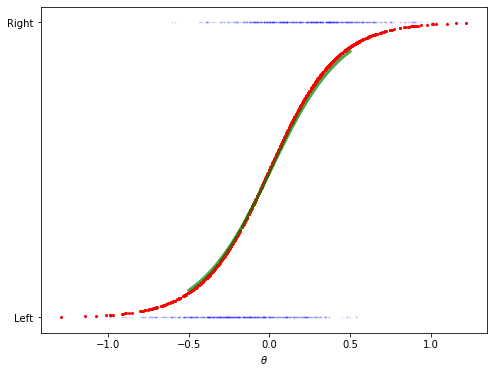

In [69]:
plt.figure(figsize = (8,6)) 
plt.scatter(theta, p, s=4, color = 'r')
plt.scatter(theta, y, s=1, alpha=.1, color = 'b')
x_values = np.linspace(-.5, .50, 100)[:, None]
y_values = model.predict_proba(x_values)[:,1]
plt.plot(x_values, y_values, 'g', alpha=.7, lw=3)
plt.xlabel(r'$\theta$')
plt.yticks([0.,1.],['Left', 'Right']);

